## Comparison of Solvers+Preconditioners##

In [1]:
from dolfin import*
%matplotlib inline
import time
from sympy import sin
import pylab

parameters['linear_algebra_backend'] = 'PETSc'
parameters["krylov_solver"]["relative_tolerance"] = 1.0e-8
parameters["krylov_solver"]["absolute_tolerance"] = 1.0e-8
parameters["krylov_solver"]["monitor_convergence"] = False
parameters["krylov_solver"]["report"] = False
parameters["krylov_solver"]["maximum_iterations"] = 500

In [2]:
def solving_time(A,b,solver):
    U = Function(V)
    t0 =time.time()
    if len(solver) == 2:
        solve(A, U.vector(), b, solver[0], solver[1])
    else:
        solve(A, U.vector(), b, solver[0])
    t1 = time.time()
    return t1 - t0
    

In [3]:
Ns = []; unknowns = []

lu_time = []
cg_time = []
cgicc_time = []
cgamg_time = []

for N in [32, 64, 128, 256, 512]:
    Ns.append(N)
    
    mesh = UnitSquareMesh(N,N)
    print(" N " , N, "dofs", mesh.num_vertices())
    unknowns.append(mesh.num_vertices())
    V = FunctionSpace(mesh, "Lagrange", 1)
    u = TrialFunction(V)
    v = TestFunction(V)
    f = Expression('(sin(x[0]*12) - x[1])', degree=1)
    a = u*v*dx + inner(grad(u), grad(v))*dx
    L = f*v*dx
    
    A = assemble(a)
    b = assemble(L)
    t2 = solving_time(A,b,["mumps"])
    print("Time for lu" , t2)
    lu_time.append(t2)
    
    t2 = solving_time(A,b,["cg"])
    print("Time for cg" , t2)
    cg_time.append(t2)
    
    t2 = solving_time(A,b,["cg", "icc"])
    print("Time for cg/icc" , t2)
    cgicc_time.append(t2)
    
    t2 = solving_time(A,b,["cg", "amg"])
    print("Time for cg/amg" , t2)
    cgamg_time.append(t2)
    
    


 N  32 dofs 1089
Time for lu 0.04553842544555664
Time for cg 0.003366708755493164
Time for cg/icc 0.004001617431640625
Time for cg/amg 0.06492424011230469
 N  64 dofs 4225
Time for lu 0.08095908164978027
Time for cg 0.03031754493713379
Time for cg/icc 0.03133654594421387
Time for cg/amg 0.04818248748779297
 N  128 dofs 16641
Time for lu 0.9906520843505859
Time for cg 0.267470121383667
Time for cg/icc 0.18586254119873047
Time for cg/amg 0.31913185119628906
 N  256 dofs 66049
Time for lu 3.62296462059021
Time for cg 3.040555715560913
Time for cg/icc 3.572374105453491
Time for cg/amg 0.6701450347900391
 N  512 dofs 263169
Time for lu 22.091312646865845
Time for cg 15.547790765762329
Time for cg/icc 19.25727653503418
Time for cg/amg 3.5777676105499268


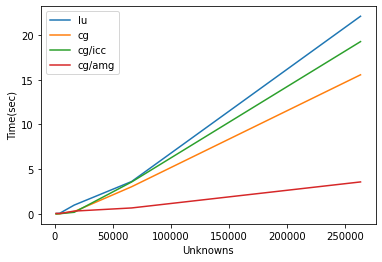

In [4]:
pylab.plot(unknowns, lu_time)
pylab.plot(unknowns, cg_time)
pylab.plot(unknowns, cgicc_time)
pylab.plot(unknowns, cgamg_time)
pylab.xlabel('Unknowns')
pylab.ylabel('Time(sec)')
pylab.legend(["lu", "cg", "cg/icc", "cg/amg"])
pylab.savefig('time_cpu.pdf')
pylab.show()
